In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/anuku/OneDrive/Desktop/Fated/Coding/Winter of Code/Datasets/unsupervised_data.csv")

In [3]:
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015
...,...,...,...,...,...,...,...
39995,39996,19.126649,-53.397074,-73.297148,69.415535,75.729247,54.485823
39996,39997,-3.768855,-32.785832,22.813179,-50.865346,-36.385833,-28.710921
39997,39998,-10.519365,51.354702,-45.129637,1.941843,13.162370,-77.770009
39998,39999,47.122315,-47.272906,-47.184628,-52.908391,-29.804291,2.042820


In [4]:
features=data.drop(columns='ID')

In [5]:
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015
...,...,...,...,...,...,...,...
39995,39996,19.126649,-53.397074,-73.297148,69.415535,75.729247,54.485823
39996,39997,-3.768855,-32.785832,22.813179,-50.865346,-36.385833,-28.710921
39997,39998,-10.519365,51.354702,-45.129637,1.941843,13.162370,-77.770009
39998,39999,47.122315,-47.272906,-47.184628,-52.908391,-29.804291,2.042820


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
def kmeans(data,k,max_iters=100,tolerance=1e-4):

    np.random.seed(42)
    data = data.to_numpy() if isinstance(data, pd.DataFrame) else data
    cluster_centers=data[np.random.choice(len(data),size=k,replace=False)]

    for i in range(max_iters):
        distances=np.linalg.norm(data[:,None]-cluster_centers,axis=2)
        cluster_assignments=np.argmin(distances,axis=1)
        new_cluster_centers=np.array([
            data[cluster_assignments==i].mean(axis=0) if np.any(cluster_assignments==i) else cluster_centers[i]
            for i in range(k)
        ])
        
        if np.linalg.norm(new_cluster_centers-cluster_centers)<tolerance:
            break

        cluster_centers=new_cluster_centers

    return cluster_centers,cluster_assignments



In [8]:
def calculate_distortion(data, cluster_centers, cluster_assignments):
    cost = 0
    for i in range(len(cluster_centers)):
        cluster_data = data[cluster_assignments == i]
        cost += np.sum(np.linalg.norm(cluster_data - cluster_centers[i], axis=1)**2)
    return cost

In [9]:
distortions=[]
k_values=range(1,11)
for k in k_values:
    cluster_centers,cluster_assignments=kmeans(features,k)
    distortion=calculate_distortion(features,cluster_centers,cluster_assignments)
    distortions.append(distortion)

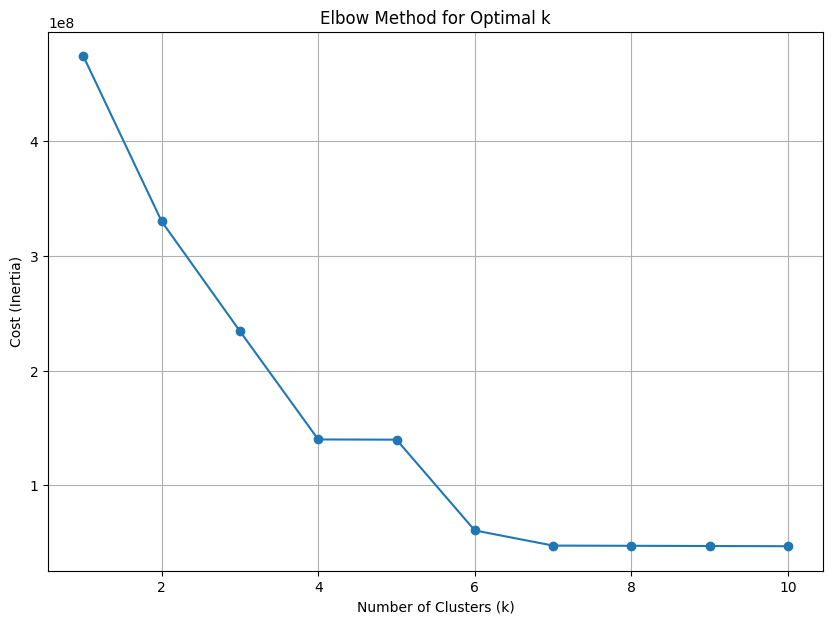

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

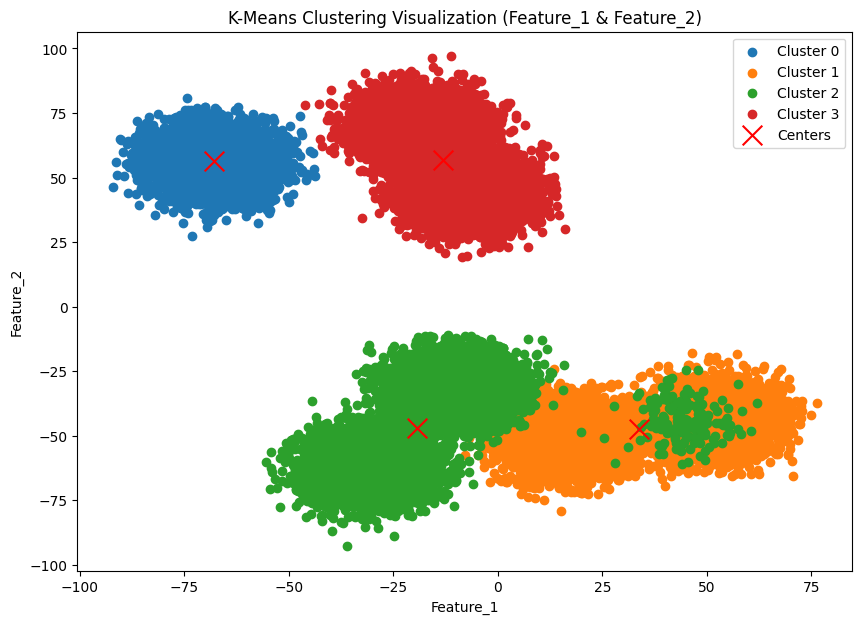

In [11]:
k=4
cluster_centers,cluster_assignments=kmeans(features,k)

data['Cluster']=cluster_assignments

plt.figure(figsize=(10,7))
for cluster in range(k):
    cluster_data=features[cluster_assignments==cluster]
    plt.scatter(cluster_data['Feature_1'],cluster_data['Feature_2'],label=f"Cluster {cluster}")

plt.scatter(cluster_centers[:, 0],cluster_centers[:, 1],color='red',marker='x',s=200,label='Centers')

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('K-Means Clustering Visualization (Feature_1 & Feature_2)')
plt.legend()
plt.show()
